# Análise de Dados - Comparação Candidatos do Estado da Bahia

### Instalando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud, STOPWORDS

plt.style.use('fivethirtyeight')

%matplotlib inline

### Lendo os dados e selecionando as colunas para analise

In [2]:
colunas=['NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'DS_ELEICAO', 'DT_ELEICAO', 
            'SG_UF', 'NM_UE', 'DS_CARGO', 'SG_PARTIDO', 'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
     'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO']

In [3]:
dados = pd.read_csv('consulta_cand_2020_BA.csv', encoding='latin', sep=';', usecols=colunas)
dados = dados.rename(columns={'NM_UE':'cidade', 'NR_CANDIDATO':'numero', 'NM_CANDIDATO':'nome', 
                                              'NM_URNA_CANDIDATO':'nome_urna', 'DS_CARGO':'cargo', 'SG_PARTIDO':'partido',
                                              'NM_MUNICIPIO_NASCIMENTO':'cidade_nascimento', 
                                              'NR_IDADE_DATA_POSSE':'idade_na_posse', 'DS_GENERO':'sexo',
                                              'DS_GRAU_INSTRUCAO':'grau_instrucao', 'DS_ESTADO_CIVIL':'estado_civil',
                                              'DS_COR_RACA':'cor_raca', 'DS_OCUPACAO':'ocupacao'
                                             })

In [4]:
# dropar colunas desnecessárias
dados.drop(columns=['DS_ELEICAO', 'DT_ELEICAO', 'SG_UF'], inplace=True)

In [5]:
dados.head()

,cidade,cargo,numero,nome,nome_urna,partido,cidade_nascimento,idade_na_posse,sexo,grau_instrucao,estado_civil,cor_raca,ocupacao
0,CAMACÃ,VEREADOR,10123,LEONARDO MOREIRA MALAQUIAS,LIÓ DA CIVIL,REPUBLICANOS,CAMACÃ,50,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,POLICIAL CIVIL
1,SANTA BRÍGIDA,VEREADOR,12555,JERFERSON OLIVEIRA NETO,XAVERINHO DO PIPA,PDT,SANTA BRÍGIDA,32,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,MOTORISTA PARTICULAR
2,CAMPO FORMOSO,VEREADOR,40777,MATHEUS FERNANDES RIBEIRO CAMACAM,MATHEUS CAMACAM,PSB,CAMPO FORMOSO,21,MASCULINO,SUPERIOR INCOMPLETO,SOLTEIRO(A),BRANCA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS"
3,GONGOGI,PREFEITO,14,MILTON MENDES DA SILVA,TUCUNARÉ,PTB,ITACARÉ,58,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),PARDA,EMPRESÁRIO
4,CORAÇÃO DE MARIA,VEREADOR,11555,GENILSON DOS SANTOS MENDES,DANGOLA,PP,CONCEIÇÃO DO JACUÍPE,44,MASCULINO,LÊ E ESCREVE,CASADO(A),PARDA,MOTORISTA PARTICULAR


In [6]:
dados.shape

(41171, 13)

### Vamos padronizar as colunas de strings para que os valores fiquem minúsculos

In [7]:
colunas_strings = ['cidade', 'cargo', 'nome', 'nome_urna', 'cidade_nascimento', 
                   'sexo', 'grau_instrucao', 'estado_civil', 'cor_raca', 'ocupacao']

In [8]:
# aplicar metodo title() para colunas com strings
dados[colunas_strings] = dados[colunas_strings].apply(lambda x: x.str.title())

### Separando o dataframe para a cidade de Ibicarai

In [9]:
candidatos_ibicarai = dados[dados['cidade'] == 'Ibicaraí']

### Checando por valores nulos

In [10]:
dados.isna().sum()

cidade               0
cargo                0
numero               0
nome                 0
nome_urna            0
partido              0
cidade_nascimento    0
idade_na_posse       0
sexo                 0
grau_instrucao       0
estado_civil         0
cor_raca             0
ocupacao             0
dtype: int64

### Avaliando tipos de dados

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41171 entries, 0 to 41170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cidade             41171 non-null  object
 1   cargo              41171 non-null  object
 2   numero             41171 non-null  int64 
 3   nome               41171 non-null  object
 4   nome_urna          41171 non-null  object
 5   partido            41171 non-null  object
 6   cidade_nascimento  41171 non-null  object
 7   idade_na_posse     41171 non-null  int64 
 8   sexo               41171 non-null  object
 9   grau_instrucao     41171 non-null  object
 10  estado_civil       41171 non-null  object
 11  cor_raca           41171 non-null  object
 12  ocupacao           41171 non-null  object
dtypes: int64(2), object(11)
memory usage: 4.1+ MB


### Checando valores duplicados

In [12]:
dados[dados.duplicated()]

,cidade,cargo,numero,nome,nome_urna,partido,cidade_nascimento,idade_na_posse,sexo,grau_instrucao,estado_civil,cor_raca,ocupacao
2506,Dom Basílio,Vice-Prefeito,11,Maria Ilza De Araújo Matias,Maria Ilza,PP,Rio De Contas,44,Feminino,Superior Completo,Viúvo(A),Branca,Administrador
6930,Cachoeira,Vereador,70123,Jesse Dos Santos,Jesse Beto,AVANTE,Cachoeira,38,Masculino,Superior Completo,Solteiro(A),Parda,Professor De Ensino Médio
7319,Feira De Santana,Vereador,23023,Girlanio Santana Guirra,Comendador Girlanio Guirra,CIDADANIA,Feira De Santana,52,Masculino,Ensino Médio Completo,Casado(A),Preta,Jornalista E Redator
9502,Feira De Santana,Vereador,23880,Zoraide Lima De Oliveira,Zoraide,CIDADANIA,Itaeté,36,Feminino,Superior Completo,Solteiro(A),Parda,Enfermeiro
11159,São Félix Do Coribe,Vereador,11222,Genivaldo De Souza Ferreira,Geninho,PP,Santa Maria Da Vitória,39,Masculino,Ensino Médio Completo,Solteiro(A),Parda,Vereador
13931,Barreiras,Vereador,51369,Marcos Vinicius Dias Wieczorek,Marcos Wieczorek,PATRIOTA,Barreiras,30,Masculino,Ensino Médio Completo,Casado(A),Branca,Outros
14384,Presidente Tancredo Neves,Prefeito,11,Antonio Dos Santos Mendes,Toin Do Bó,PP,Valença,52,Masculino,Ensino Fundamental Incompleto,Casado(A),Parda,Prefeito
14737,Presidente Dutra,Vice-Prefeito,40,Ailton De Sousa Filho,Ailton Filho (Negão),PSD,Presidente Dutra,47,Masculino,Ensino Médio Completo,Solteiro(A),Parda,Comerciante
14853,São Félix Do Coribe,Vereador,11112,Luzia De Jesus Nascimento,Luzia Da Bela Vista,PP,Coribe,56,Feminino,Ensino Fundamental Incompleto,Solteiro(A),Parda,Agricultor
15525,Ituberá,Vereador,25114,Thaissa Fyamma Martins Rocha,Thaissa Rocha,DEM,Ituberá,27,Feminino,Superior Completo,Solteiro(A),Parda,Gerente


In [13]:
dados.drop_duplicates(inplace=True)

Dados prontos para análise..;)

### Vamos primeiro separar os dataframes da cidade de Ibicarai do resto do estado da Bahia.

In [15]:
dados_ibicarai = dados[dados['cidade'] == 'Ibicaraí']
dados_bahia = dados[dados['cidade'] != 'Ibicaraí']

###### Dataframe com todas as cidades da Bahia.

In [19]:
dados['cidade'].nunique()

417

###### Dataframe com todas as cidades, exceto Ibicaraí

In [18]:
dados_bahia['cidade'].nunique()

416

### Sobrenomes dos Candidatos

###### Primeiramente vamos criar uma formula para plotar os sobrenomes num wordcloud

In [111]:
def word_cloud(lista, stopwords):
    cloud = ''
    for i in lista:
        i = str(i)
        sep = i.split()
        for x in range(len(sep)):
            sep[x] = sep[x].lower()
            cloud += " ".join(sep)+" "
    
    final_wordcloud = WordCloud(width = 900, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(cloud)
    
    plt.figure(figsize = (12, 10), facecolor = None) 
    plt.imshow(final_wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

###### Sobrenomes mais populares do estado da Bahia

In [98]:
# vamos extrair o sobrenome de cada candidato e colocar todos eles numa lista unica
lista_nome1 = []
for nome1 in dados_bahia['nome'].values:
    x = nome1.split()[1:]
    lista_nome1.extend(x)

In [99]:
s1_sobrenomes = pd.Series(collections.Counter(lista_nome1))
s1_sobrenomes.drop(labels=['De', 'Dos', 'Da', 'Do'], inplace=True)
s1_sobrenomes.nlargest(20)

Santos        10924
Silva          7621
Oliveira       3787
Souza          3770
Jesus          2646
Pereira        2013
Alves          1600
Santana        1457
Ferreira       1436
Lima           1414
Almeida        1274
Nascimento     1120
Costa          1117
Rodrigues       949
Ribeiro         939
Gomes           856
Carvalho        839
Barbosa         785
Conceição       759
Rocha           747
dtype: int64

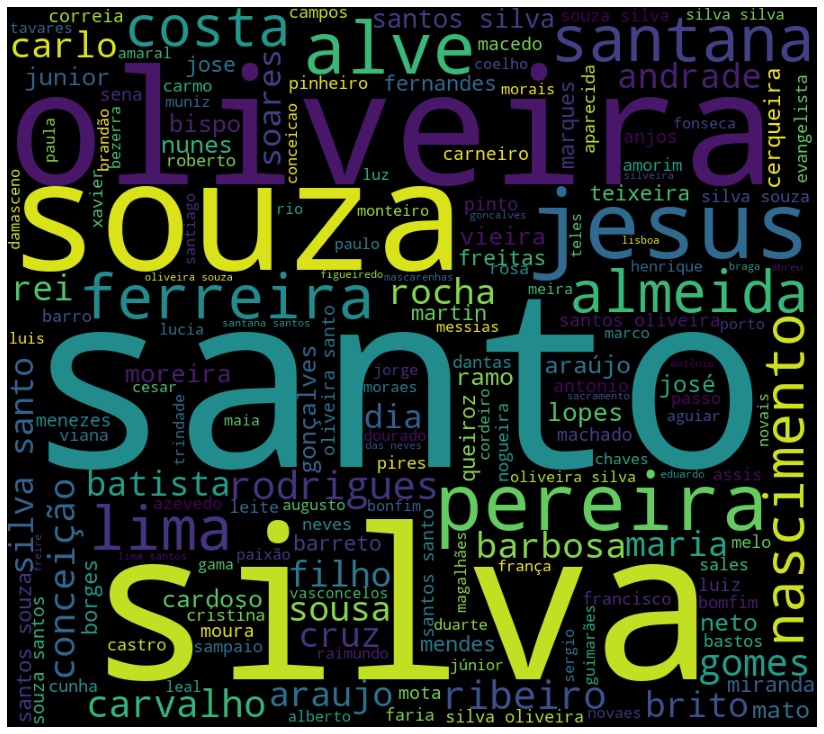

In [115]:
palavras_fora1 = ['De', 'Dos', 'Da', 'Do']
word_cloud(lista_nome1, palavras_fora1)

###### Sobrenomes mais populares da cidade de Ibicaraí

In [116]:
lista_nome2 = []
for nome2 in dados_ibicarai['nome'].values:
    x = nome2.split()[1:]
    lista_nome2.extend(x)

In [118]:
s2_sobrenomes = pd.Series(collections.Counter(lista_nome2))
s2_sobrenomes.drop(labels=['De', 'Dos', 'Da', 'Maria', 'Raimundo'], inplace=True)
s2_sobrenomes.nlargest(20)

Santos        35
Silva         27
Oliveira      20
Alves         13
Souza         10
Costa          9
Soares         7
Neto           7
Nascimento     7
Santana        6
Ferreira       6
Jesus          6
Pereira        5
Assis          5
Dias           5
Lima           4
Sousa          3
Gonçalves      3
Batista        3
Almeida        3
dtype: int64

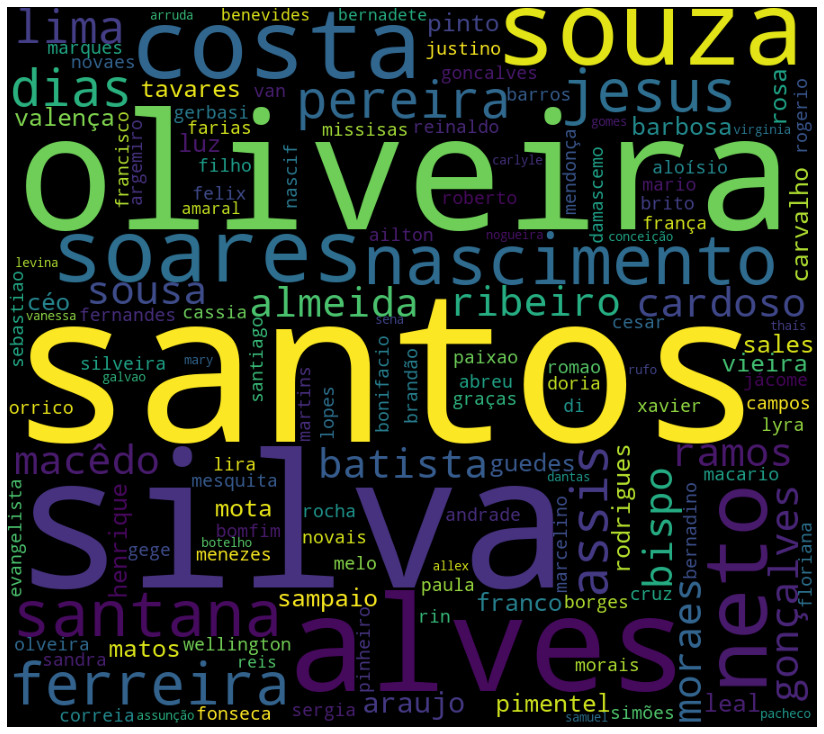

In [125]:
palavras_fora2 = ['De', 'Dos', 'Da', 'Maria', 'Raimundo', 'das', 'sergio', 'Sergio', 'elias', 'Elias', 'jose', 'olveira'
                 'di', 'marcos', 'josé', 'luiz', 'Carlos', 'carlos']
word_cloud(lista_nome2, palavras_fora2)

### Curiosidade sobre nome na urna

In [218]:
lista_nome_urna = []
for i in dados_bahia['nome_urna'].values:
    x = i.split()
    lista_nome_urna.extend(x)

In [219]:
lista_nome_urna = [x.lower() for x in lista_nome_urna]

In [215]:
s_nomeurna = pd.Series(collections.Counter(lista_nome_urna))

In [216]:
s_nomeurna['zé'] = s_nomeurna['zé'] + s_nomeurna['ze']
s_nomeurna['professor'] = s_nomeurna['professor'] + s_nomeurna['prof']
s_nomeurna['saúde'] = s_nomeurna['saúde'] + s_nomeurna['saude']
s_nomeurna['júnior'] = s_nomeurna['júnior'] + s_nomeurna['junior']
s_nomeurna['táxi'] = s_nomeurna['táxi'] + s_nomeurna['taxi']
s_nomeurna.drop(labels=['de', 'do', 'da', 'oliveira', 'silva', 'joão', 'maria', 'santos', 'lima', 'souza', 
                       'santana', 'dos', 'ze', 'saude', 'paulo', 'carlos', 'jorge', 'marcos', 'ana',
                       'pedro', 'luiz', 'antonio', 'roberto', 'marcelo', 'costa', 'rocha', 'ribeiro', 'alves',
                       'val', 'brito', 'gil', 'almeida', 'luciano', 'ferreira', 'alex', 'reis', 'barbosa',
                       'manoel', 'beto', 'das', 'rita', 'carvalho', 'lucas', 'gomes', 'ricardo', 'rodrigues',
                       'raimundo', 'adriana', 'pereira', 'dias', 'fernando', 'andrade', 'lopes', 'léo',
                       'borges', 'leo', 'marcio', 'josé', 'daniel', 'robson', 'rosa', 'rose', 'adriano', 'gilson',
                       'pró', 'prof', 'cardoso', 'edson', 'fabio', 'barreto', 'eduardo', 'joao', 'rodrigo', 'simone',
                       'miranda', 'claudio', 'junior', 'nunes', 'paula', 'ramos', 'bruno', 'sandra', 'sergio',
                       'cristina', 'nascimento', 'batista', 'matos', 'vieira', 'sandro', 'martins', 'gilmar', 
                       'ronaldo', 'taxi', 'roque'], inplace=True)
s_nomeurna.nlargest(15)

zé            797
professor     670
saúde         605
professora    490
dr            334
júnior        334
pastor        311
irmão         252
neto          191
povo          169
sindicato     160
nego          128
táxi          122
carlinhos     116
galego        111
dtype: int64

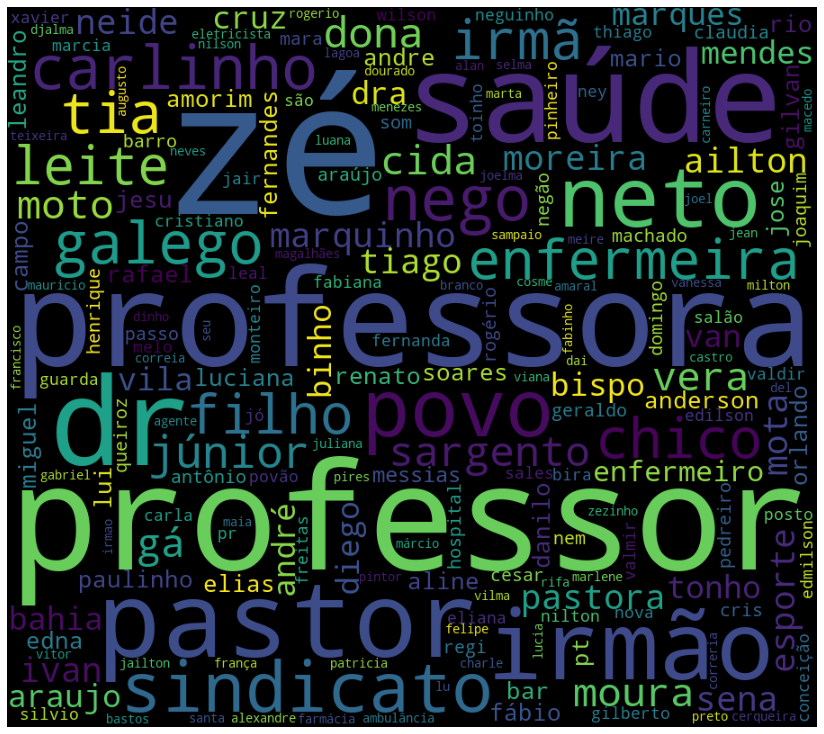

In [222]:
palavras_fora3 = ['de', 'do', 'da', 'oliveira', 'silva', 'joão', 'maria', 'santos', 'lima', 'souza', 
                       'santana', 'dos', 'ze', 'saude', 'paulo', 'carlos', 'jorge', 'marcos', 'ana',
                       'pedro', 'luiz', 'antonio', 'roberto', 'marcelo', 'costa', 'rocha', 'ribeiro', 'alves',
                       'val', 'brito', 'gil', 'almeida', 'luciano', 'ferreira', 'alex', 'reis', 'barbosa',
                       'manoel', 'beto', 'das', 'rita', 'carvalho', 'lucas', 'gomes', 'ricardo', 'rodrigues',
                       'raimundo', 'adriana', 'pereira', 'dias', 'fernando', 'andrade', 'lopes', 'léo',
                       'borges', 'leo', 'marcio', 'josé', 'daniel', 'robson', 'rosa', 'rose', 'adriano', 'gilson',
                       'pró', 'prof', 'cardoso', 'edson', 'fabio', 'barreto', 'eduardo', 'joao', 'rodrigo', 'simone',
                       'miranda', 'claudio', 'junior', 'nunes', 'paula', 'ramos', 'bruno', 'sandra', 'sergio',
                       'cristina', 'nascimento', 'batista', 'matos', 'vieira', 'sandro', 'martins', 'gilmar', 
                       'ronaldo', 'taxi', 'roque']

word_cloud(lista_nome_urna, palavras_fora3)

In [223]:
dados.head()

,cidade,cargo,numero,nome,nome_urna,partido,cidade_nascimento,idade_na_posse,sexo,grau_instrucao,estado_civil,cor_raca,ocupacao
0,Camacã,Vereador,10123,Leonardo Moreira Malaquias,Lió Da Civil,REPUBLICANOS,Camacã,50,Masculino,Ensino Médio Completo,Solteiro(A),Branca,Policial Civil
1,Santa Brígida,Vereador,12555,Jerferson Oliveira Neto,Xaverinho Do Pipa,PDT,Santa Brígida,32,Masculino,Ensino Médio Completo,Solteiro(A),Parda,Motorista Particular
2,Campo Formoso,Vereador,40777,Matheus Fernandes Ribeiro Camacam,Matheus Camacam,PSB,Campo Formoso,21,Masculino,Superior Incompleto,Solteiro(A),Branca,"Estudante, Bolsista, Estagiário E Assemelhados"
3,Gongogi,Prefeito,14,Milton Mendes Da Silva,Tucunaré,PTB,Itacaré,58,Masculino,Ensino Fundamental Incompleto,Solteiro(A),Parda,Empresário
4,Coração De Maria,Vereador,11555,Genilson Dos Santos Mendes,Dangola,PP,Conceição Do Jacuípe,44,Masculino,Lê E Escreve,Casado(A),Parda,Motorista Particular


In [356]:
round(dados.groupby('cor_raca')['grau_instrucao'].value_counts(normalize=True)*100, 2)

cor_raca        grau_instrucao               
Amarela         Ensino Médio Completo            40.38
                Superior Completo                26.92
                Ensino Fundamental Incompleto    11.54
                Ensino Fundamental Completo       9.62
                Ensino Médio Incompleto           5.13
                Superior Incompleto               4.49
                Lê E Escreve                      1.92
Branca          Ensino Médio Completo            40.90
                Superior Completo                29.92
                Ensino Fundamental Incompleto    10.07
                Ensino Fundamental Completo       8.68
                Ensino Médio Incompleto           4.08
                Superior Incompleto               3.98
                Lê E Escreve                      2.37
Indígena        Ensino Médio Completo            35.82
                Ensino Fundamental Incompleto    18.66
                Ensino Fundamental Completo      13.43
                Sup

#### Analise Univariavel

Idade na posse:
    - vemos que a distribuicao maior fica em torno dos 50 anos de idade

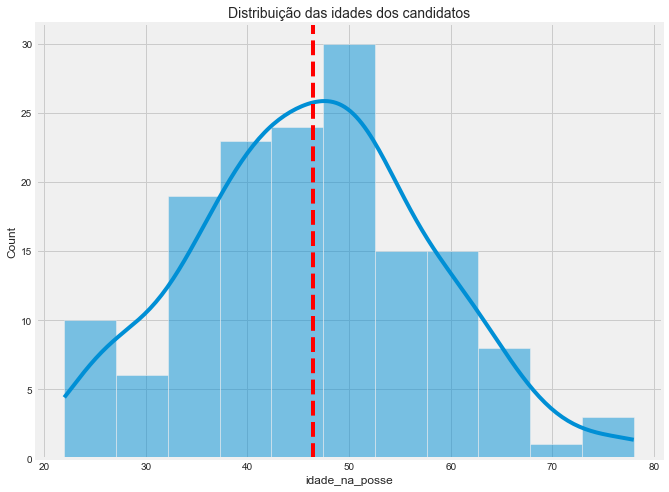

In [106]:
plt.figure(figsize=(10,8))

sns.histplot(cand_ibicarai['idade_na_posse'], kde=True)
plt.axvline(x=cand_ibicarai['idade_na_posse'].mean(), c='red', ls='--')
plt.title('Distribuição das idades dos candidatos', fontsize=14);

#### Analise Bivariavel

Relações de Gênero

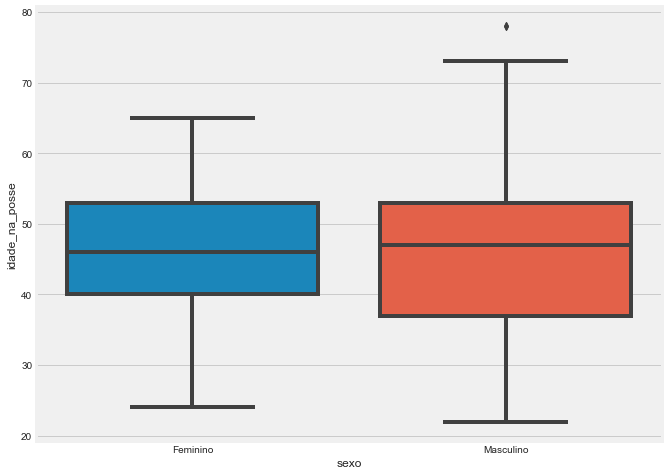

In [153]:
plt.figure(figsize=(10,8))
sns.boxplot(x=cand_ibicarai['sexo'], y=cand_ibicarai['idade_na_posse']);

#### Diferenças de Genero

In [7]:
# por grau de instrucao
# 86% das mulheres tem ensino medio completo ou superior completo. Homens ficam em 66%
# 34% tem ensino superior completo. Enquanto os homens sao 18%
cand_ibi.groupby('sexo')['grau_instrucao'].value_counts()

sexo       grau_instrucao               
FEMININO   ENSINO MÉDIO COMPLETO            28
           SUPERIOR COMPLETO                18
           SUPERIOR INCOMPLETO               3
           ENSINO FUNDAMENTAL INCOMPLETO     2
           ENSINO FUNDAMENTAL COMPLETO       1
           ENSINO MÉDIO INCOMPLETO           1
MASCULINO  ENSINO MÉDIO COMPLETO            48
           SUPERIOR COMPLETO                19
           ENSINO FUNDAMENTAL COMPLETO      15
           ENSINO FUNDAMENTAL INCOMPLETO    10
           ENSINO MÉDIO INCOMPLETO           5
           SUPERIOR INCOMPLETO               4
Name: grau_instrucao, dtype: int64

In [9]:
round(cand_ibi.groupby('sexo')['ocupacao'].value_counts(normalize=True)*100,2)

sexo       ocupacao                                                              
FEMININO   OUTROS                                                                    35.85
           COMERCIANTE                                                                9.43
           SERVIDOR PÚBLICO MUNICIPAL                                                 9.43
           TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO ENFERMEIRO)                   5.66
           DONA DE CASA                                                               3.77
           ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS                             3.77
           PROFESSOR DE ENSINO FUNDAMENTAL                                            3.77
           RECEPCIONISTA                                                              3.77
           VEREADOR                                                                   3.77
           AGENTE ADMINISTRATIVO                                                      1.89
        

In [10]:
cand_ibi.groupby('sexo')['idade_na_posse'].value_counts().nlargest(3)

sexo       idade_na_posse
MASCULINO  50                8
           42                5
           49                5
Name: idade_na_posse, dtype: int64

In [33]:
cand_ibi['sexo'].value_counts()

MASCULINO    101
FEMININO      53
Name: sexo, dtype: int64

#### Ocupação

In [25]:
cand_ibi.loc[cand_ibi['cargo'].str.contains('PREFEITO'), 'nome':'ocupacao']

,nome,nome_urna,cargo,partido,cidade_nascimento,idade_na_posse,sexo,grau_instrucao,estado_civil,cor_raca,ocupacao
7229,MONALISA GONCALVES TAVARES,DRA MONALISA,PREFEITO,DEM,ITABUNA,53,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,MÉDICO
10284,FABIANE LYRA DE SOUZA,FABIANE,VICE-PREFEITO,PT,ITABUNA,52,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,EMPRESÁRIO
13981,LEILTON SILVA GUEDES,DINHO GUEDES,VICE-PREFEITO,REPUBLICANOS,IBICARAÍ,62,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,COMERCIANTE
14100,EDENILSON GONÇALVES FERREIRA,TENENTE GONÇALVES,PREFEITO,REPUBLICANOS,IBICARAÍ,60,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,POLICIAL MILITAR
17240,LUIZ JÁCOME BRANDÃO NETO,LULA BRANDÃO,PREFEITO,PSD,ITABUNA,47,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,PREFEITO
21831,GIVANILSON FRANCISCO DOS SANTOS,VAN,VICE-PREFEITO,AVANTE,ITAPETINGA,49,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,COMERCIANTE
29861,LENILDO ALVES SANTANA,LENILDO,PREFEITO,PT,FLORESTA AZUL,53,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,PROFESSOR DE ENSINO MÉDIO
30317,KLAUSS DE OLIVEIRA MARTINS PINHEIRO FARIAS,KLAUSS FARIAS,PREFEITO,PP,ITABUNA,37,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,ADVOGADO
35243,HENRIQUE PIMENTEL SAMPAIO NETO,HENRIQUE SAMPAIO,VICE-PREFEITO,PP,IBICARAÍ,50,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,REPRESENTANTE COMERCIAL
39581,ADELSON OLIVEIRA DOS SANTOS,ADELSON DA BANCA,VICE-PREFEITO,DEM,ITAPITANGA,51,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,EMPRESÁRIO


In [106]:
# aqui podemos analisar o grau de instrucao de acordo com a cor declarada de cada 1
cand_ibi[cand_ibi['cor_raca'].str.contains('PRETA')]['grau_instrucao'].value_counts()

ENSINO MÉDIO COMPLETO            11
SUPERIOR COMPLETO                 4
ENSINO FUNDAMENTAL COMPLETO       3
ENSINO FUNDAMENTAL INCOMPLETO     3
ENSINO MÉDIO INCOMPLETO           1
Name: grau_instrucao, dtype: int64

#### Sobre os Partidos

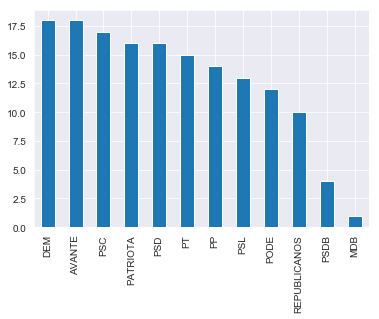

In [331]:
cand_ibi['partido'].value_counts().plot(kind='bar')

In [26]:
cand_ibi[cand_ibi['sexo'] == 'FEMININO']['partido'].value_counts()

PSD             7
AVANTE          6
PSC             6
PATRIOTA        6
DEM             6
PT              5
PSL             4
PODE            4
PP              4
REPUBLICANOS    3
PSDB            2
Name: partido, dtype: int64

In [28]:
cand_ibi.groupby('partido')['sexo'].value_counts()

partido       sexo     
AVANTE        MASCULINO    12
              FEMININO      6
DEM           MASCULINO    12
              FEMININO      6
MDB           MASCULINO     1
PATRIOTA      MASCULINO    10
              FEMININO      6
PODE          MASCULINO     8
              FEMININO      4
PP            MASCULINO    10
              FEMININO      4
PSC           MASCULINO    11
              FEMININO      6
PSD           MASCULINO     9
              FEMININO      7
PSDB          FEMININO      2
              MASCULINO     2
PSL           MASCULINO     9
              FEMININO      4
PT            MASCULINO    10
              FEMININO      5
REPUBLICANOS  MASCULINO     7
              FEMININO      3
Name: sexo, dtype: int64

#### Idade na Posse

In [27]:
cand_ibi[cand_ibi['sexo'] == 'FEMININO']['idade_na_posse'].value_counts().sort_index()

24    1
25    1
26    2
33    1
34    1
36    1
37    2
38    2
39    1
40    3
41    2
42    4
43    2
44    1
45    2
46    3
47    2
48    1
49    1
50    1
51    2
52    3
53    2
54    2
55    2
57    3
60    1
61    1
64    2
65    1
Name: idade_na_posse, dtype: int64

In [84]:
cand_ibi['idade_na_posse'].value_counts().sort_index()

22    1
24    2
25    2
26    3
27    2
28    3
29    1
30    2
33    4
34    4
35    2
36    4
37    5
38    4
39    2
40    5
41    3
42    9
43    6
44    5
45    2
46    6
47    5
48    3
49    6
50    9
51    4
52    8
53    5
54    2
55    4
56    1
57    3
58    3
59    3
60    4
61    1
62    4
63    2
64    2
65    1
67    3
70    1
73    1
78    2
Name: idade_na_posse, dtype: int64

#### Sexo

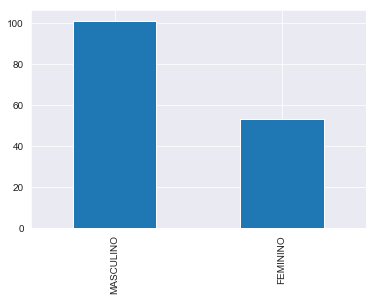

In [334]:
cand_ibi['sexo'].value_counts().plot(kind='bar')

In [ ]:
sns.countplot(x=)

#### Grau de Instrucao

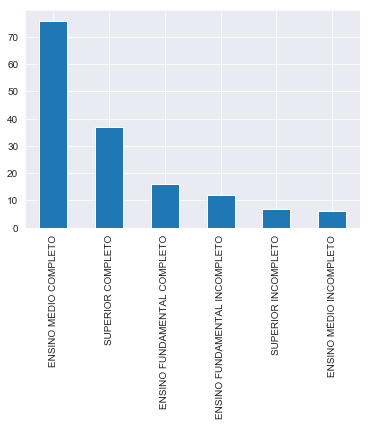

In [337]:
cand_ibi['grau_instrucao'].value_counts().plot(kind='bar')

In [ ]:
sns.countplot(x=cand_ibi['grau_instrucao'], data=cand_ibi, hue=cand_ibi['idade_na_posse'])
plt.xticks(rotation=90)

#### Cor Raca

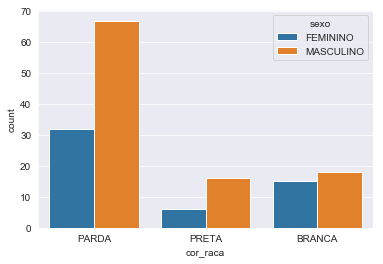

In [12]:
sns.countplot(x=cand_ibi['cor_raca'], data=cand_ibi, hue=cand_ibi['sexo'])

<AxesSubplot:>

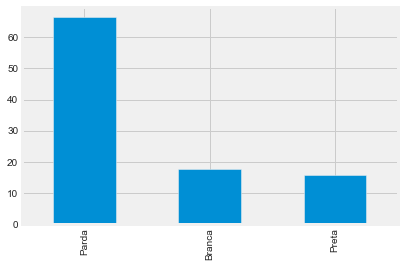

In [131]:
x = cand_ibicarai.groupby('sexo')['cor_raca'].get_group('Masculino').value_counts(normalize=True)*100
x.plot(kind='bar')

### Eleitores de Ibicarai

In [22]:
eleitores = pd.read_csv('eleitorado.csv', encoding='latin', sep=';')
ibi = eleitores[(eleitores['SG_UF'] == 'BA') & (eleitores['NM_MUNICIPIO'] == 'IBICARAÍ')]

In [23]:
ibi[ibi['DS_ESTADO_CIVIL'].isin(['VIÚVO'])]['QT_ELEITORES_PERFIL'].sum()

569

In [24]:
for x in ibi['DS_GRAU_ESCOLARIDADE'].unique():
    print(x + ':', ibi[ibi['DS_GRAU_ESCOLARIDADE'].isin([x])]['QT_ELEITORES_PERFIL'].sum())

ENSINO FUNDAMENTAL COMPLETO: 988
ENSINO MÉDIO COMPLETO: 4001
SUPERIOR INCOMPLETO: 640
ENSINO MÉDIO INCOMPLETO: 2393
ENSINO FUNDAMENTAL INCOMPLETO: 5232
SUPERIOR COMPLETO: 1466
LÊ E ESCREVE: 2108
ANALFABETO: 2365
NÃO INFORMADO: 10


In [36]:
ibi.groupby('DS_ESTADO_CIVIL')[['QT_ELEITORES_PERFIL']].sum()

,QT_ELEITORES_PERFIL
DS_ESTADO_CIVIL,
CASADO,3642
DIVORCIADO,418
NÃO INFORMADO,13
SEPARADO JUDICIALMENTE,77
SOLTEIRO,14484
VIÚVO,569


In [29]:
ibi.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRIA', 'DS_MUN_SIT_BIOMETRIA',
       'NR_ZONA', 'CD_GENERO', 'DS_GENERO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA',
       'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL',
       'QT_ELEITORES_BIOMETRIA', 'QT_ELEITORES_DEFICIENCIA',
       'QT_ELEITORES_INC_NM_SOCIAL'],
      dtype='object')

In [31]:
ibi

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
108561,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,1600,16 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,0,0,0
108562,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,1700,17 anos,6,ENSINO MÉDIO COMPLETO,5,4,0,0
108563,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,1800,18 anos,7,SUPERIOR INCOMPLETO,1,1,0,0
108564,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,4044,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,55,48,0,0
108565,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,2,...,1,SOLTEIRO,5054,50 a 54 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,149,132,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642159,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,6569,65 a 69 anos,1,ANALFABETO,3,2,0,0
642160,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,6569,65 a 69 anos,8,SUPERIOR COMPLETO,1,1,0,0
642161,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,0,0,0
642162,04/09/2020,17:42:53,9999,BA,35416,IBICARAÍ,-1,#NULO#,29,4,...,9,DIVORCIADO,8084,80 a 84 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0


Text(0.5, 0, 'Faixa Etaria x Grau Escolaridade')

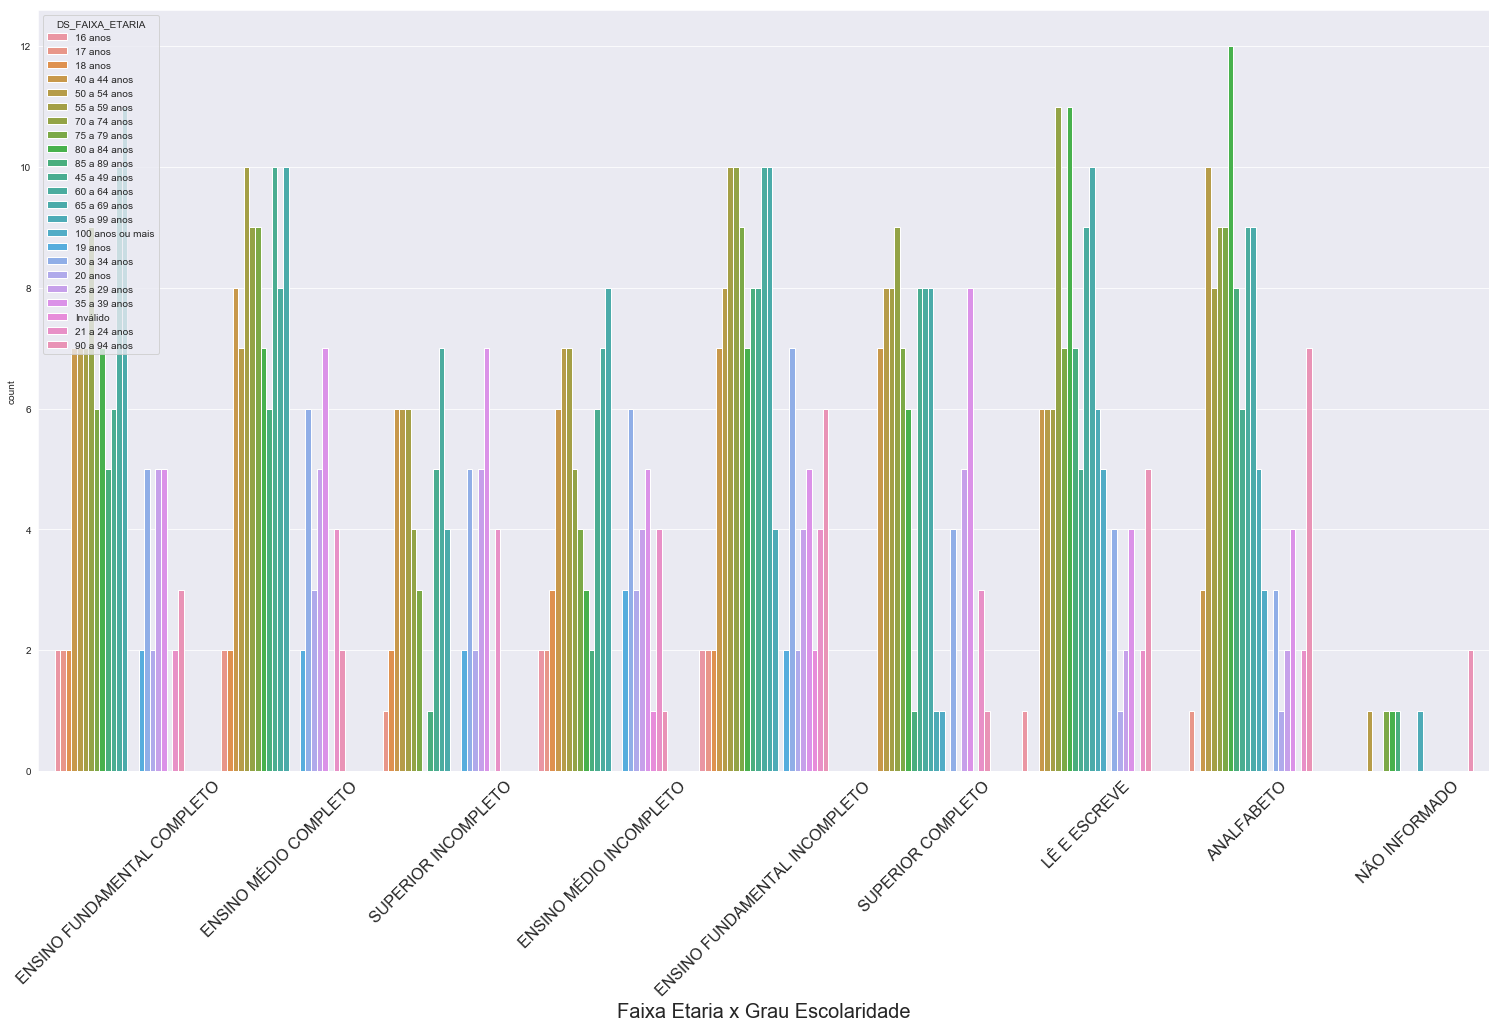

In [82]:
plt.figure(figsize=(26, 14))
sns.countplot(x=ibi['DS_GRAU_ESCOLARIDADE'], hue=ibi['DS_FAIXA_ETARIA'])
plt.xticks(rotation=45, fontsize=16)
plt.xlabel('Faixa Etaria x Grau Escolaridade', fontsize=20)
